In [22]:
import numpy as np
import sys
import os

# Add the src directory to the system path
src_path = os.path.abspath(os.path.join("..", "src"))
if src_path not in sys.path:
    sys.path.append(src_path)

from autograd.Tensor import Tensor
from autograd.Layer import LinearLayer, MLP

DATA_PATH = "../data/mnist/"

#with open(DATA_PATH + "mnist_train.csv", "r") as f:
    #train_data = np.array([line.strip().split(",") for line in f.readlines()])

train_data = np.loadtxt(DATA_PATH + "mnist_train.csv", delimiter=",")
test_data = np.loadtxt(DATA_PATH + "mnist_test.csv", delimiter=",")

Y_train = train_data[:, 0].astype(np.int32)
X_train = train_data[:, 1:].astype(np.float32) / 255.0  # Normalize pixel values
Y_test = test_data[:, 0].astype(np.int32)
X_test = test_data[:, 1:].astype(np.float32) / 255.0  # Normalize pixel values

# Convert labels to one-hot encoding
Y_train = np.eye(int(Y_train.max() + 1))[Y_train].astype(np.float32)
Y_test = np.eye(int(Y_test.max() + 1))[Y_test].astype(np.float32)


print("Training data shape:", X_train.shape, Y_train.shape)

def categorical_cross_entropy(pred, target):
    return -(((target * (pred + 1e-9).log()).sum(axis=1)).mean(axis=0))

nin = X_train.shape[1]
C = 10  # Number of classes, assuming labels are 0-indexed

print(nin, C)

nn = MLP(nin, C, nLayers=4, nhidden=[64, 32, 16])

Training data shape: (60000, 784) (60000, 10)
784 10


In [23]:
N = X_train.shape[0]
MINIBATCH_SIZE = 32
ITERATIONS = 2000
lre = np.linspace(-4, 0, ITERATIONS)
lrs = 10 ** lre

In [24]:
lri = []
lossi = []

for i in range(ITERATIONS):
    # build minibatch
    ix = np.random.randint(0, N, MINIBATCH_SIZE)
    X_batch = Tensor(X_train[ix])
    Y_batch = Tensor(Y_train[ix])

    # forward pass
    out = nn.forward(X_batch)
    loss = categorical_cross_entropy(out, Y_batch)
    print(f"Iteration nº{i}. Loss:", loss.data)

    # backward pass
    nn.zero_grad()
    loss.backward()

    # update parameters
    lr = lrs[i]
    for param in nn.params:
        param.data -= lr * param.grad

    # Store learning rate and loss for plotting
    lri.append(lre[i])
    lossi.append(loss.data.item())

Iteration nº0. Loss: [[2.30271741]]
Iteration nº1. Loss: [[2.30270784]]
Iteration nº2. Loss: [[2.30218427]]
Iteration nº3. Loss: [[2.3020379]]
Iteration nº4. Loss: [[2.30273478]]
Iteration nº5. Loss: [[2.30193028]]
Iteration nº6. Loss: [[2.30298203]]
Iteration nº7. Loss: [[2.30302327]]
Iteration nº8. Loss: [[2.30283716]]
Iteration nº9. Loss: [[2.30239444]]
Iteration nº10. Loss: [[2.3022789]]
Iteration nº11. Loss: [[2.3028087]]
Iteration nº12. Loss: [[2.30226567]]
Iteration nº13. Loss: [[2.302716]]
Iteration nº14. Loss: [[2.30346928]]
Iteration nº15. Loss: [[2.30219142]]
Iteration nº16. Loss: [[2.30201931]]
Iteration nº17. Loss: [[2.30278093]]
Iteration nº18. Loss: [[2.30249189]]
Iteration nº19. Loss: [[2.30227943]]
Iteration nº20. Loss: [[2.30167327]]
Iteration nº21. Loss: [[2.3020773]]
Iteration nº22. Loss: [[2.3023667]]
Iteration nº23. Loss: [[2.30247369]]
Iteration nº24. Loss: [[2.30262575]]
Iteration nº25. Loss: [[2.30310051]]
Iteration nº26. Loss: [[2.30314582]]
Iteration nº27. Lo

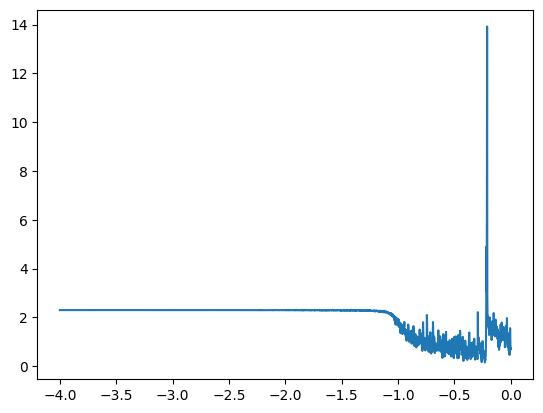

: 

In [ ]:
import matplotlib.pyplot as plt

plt.plot(lri, lossi)